In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium
from folium.plugins import MarkerCluster

# Neighbourhood Listings in Descending Order

Imported the listing.csv file

In [2]:
listings = pd.read_csv(r"listings.csv", parse_dates=['last_review'], encoding='utf-8')
listings.head(100)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,1489424,"Welcoming, easygoing, comfy bed, entire level",5294164,Efrat,NaN,FOURTEENTH WARD,42.66719,-73.81580,Private room,50.0,1,242,2024-02-10,1.91,1,0,48,NaN
1,2992450,Luxury 2 bedroom apartment,4621559,Kenneth,NaN,THIRD WARD,42.65789,-73.75370,Entire home/apt,70.0,28,9,2022-08-17,0.08,1,349,0,NaN
2,3820211,Restored Precinct in Center Sq. w/Parking,19648678,Terra,NaN,SIXTH WARD,42.65222,-73.76724,Entire home/apt,125.0,2,291,2023-11-19,2.52,4,357,8,NaN
3,5651579,Large studio apt by Capital Center & ESP@,29288920,Gregg,NaN,SECOND WARD,42.64615,-73.75966,Entire home/apt,68.0,2,333,2024-02-01,3.12,2,148,28,NaN
4,6623339,Center Sq. Loft in Converted Precinct w/ Parking,19648678,Terra,NaN,SIXTH WARD,42.65222,-73.76724,Entire home/apt,140.0,1,306,2023-12-26,2.89,4,0,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,45313545,Adorable & Trendy 1 Bd Apt Minutes to Albany Med!,165293595,Kori,NaN,NINTH WARD,42.65450,-73.78223,Entire home/apt,76.0,2,102,2024-01-20,2.52,1,144,39,NaN
96,45528939,UNIQUE Gem in HEART of Albany ★ Spiral Staircase,47625981,Linda,NaN,SECOND WARD,42.64801,-73.75668,Entire home/apt,120.0,1,83,2023-11-30,2.24,15,335,23,NaN
97,45529316,WOW ★ Bright Apt ★ PRIME downtown Walk Everywhere,47625981,Linda,NaN,SECOND WARD,42.64821,-73.75793,Entire home/apt,120.0,1,93,2024-01-09,2.50,15,0,24,NaN
98,45529447,★ 2 BEDROOM / 1 BATH TRENDY Apt ★ Downtown Albany,47625981,Linda,NaN,SECOND WARD,42.64713,-73.75628,Entire home/apt,140.0,1,117,2024-01-29,3.17,15,0,29,NaN


Counted the listings per neighbourhood and sorted the values in descending order.

In [3]:
count_listings_per_neighbourhood = listings.groupby('neighbourhood').size().sort_values(ascending=False)
count_listings_per_neighbourhood

neighbourhood
SIXTH WARD         86
SECOND WARD        51
TENTH WARD         37
FOURTEENTH WARD    35
THIRD WARD         35
NINTH WARD         32
THIRTEENTH WARD    31
ELEVENTH WARD      19
SEVENTH WARD       18
FIFTEENTH WARD     17
FOURTH WARD        14
EIGHTH WARD         9
FIRST WARD          9
FIFTH WARD          8
TWELFTH WARD        6
dtype: int64

# Neighbourhood Prices in Descending Order

Created a table with the prices per neighbourhood. 
The prices information will contain:

* median price per neighbourhood

* mean price per neighbourhood

* standard deviation per neighbourhood

* number of listings per neighbourhood.

The contents of the table will be in descending median prices.

In [4]:
# Cleaned the price data: removed currency symbols and converted them to float 
listings['price'] = listings['price'].replace('[$,]', '', regex=True).astype(float)

# Grouped by neighbourhood and calculated required statistics 
price_stats_per_neighbourhood = listings.groupby('neighbourhood')['price'].agg(
    ['median', 'mean', 'std', 'count']).reset_index()

# Renamed the columns for the aggregations that got created
price_stats_per_neighbourhood.columns = ['Neighbourhood', 'Median Price', 'Mean Price', 
                                         'Standard Deviation', 'Number of Listings']

# Sorted by median price in descending order
price_stats_per_neighbourhood = price_stats_per_neighbourhood.sort_values(by='Median Price', ascending=False)

# Displayed the DataFrame
price_stats_per_neighbourhood.head()

,Neighbourhood,Median Price,Mean Price,Standard Deviation,Number of Listings
0,EIGHTH WARD,196.0,195.400000,110.114940,5
2,FIFTEENTH WARD,196.0,300.117647,421.568334,17
4,FIRST WARD,117.5,126.125000,56.242936,8
8,SECOND WARD,117.0,117.261905,41.673563,42
6,FOURTH WARD,115.0,151.076923,122.177781,13


# Availability per Day

Imported the calendar.csv file.

Cleand the calendar data (changed the f = 0 & t = 1).

Created a dataframe and found the number of available listings per day by performing group by & sum.

Created a plot with the number of listings available per day, on the $y$ axis, and the date, on the $x$ axis.

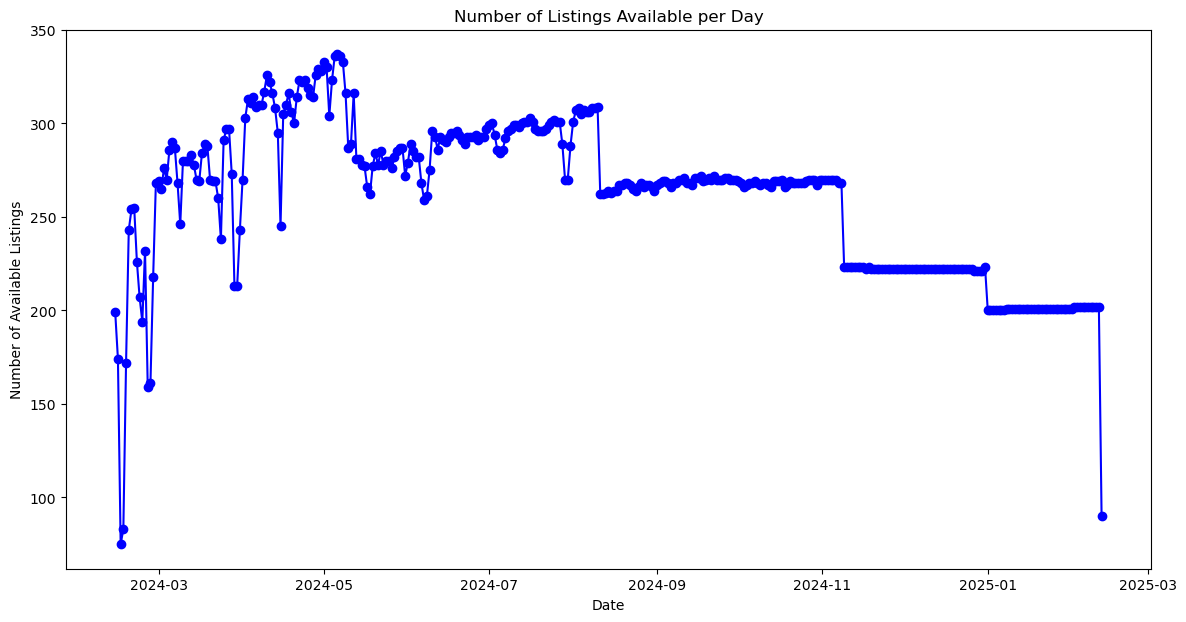

In [5]:
calendar = pd.read_csv(r"calendar.csv.gz", parse_dates=['date'], encoding='utf-8')
#calendar.head(100)

# Converted 'available' column to binary format: 1 for available ('t'), 0 for not available ('f')
calendar['available'] = (calendar['available'] == 't').astype(int)

# Summarized the availability per date and found the number of available listings per day
availability_per_day = calendar.groupby('date')['available'].sum().reset_index()

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(availability_per_day['date'], availability_per_day['available'], marker='o', linestyle='-', color='blue')
plt.title('Number of Listings Available per Day')
plt.xlabel('Date')
plt.ylabel('Number of Available Listings')
plt.show()

# Reviews, Occupacy per Listing, Average Income

Created a histogram showing the number of reviews per listing. 

The histogram bins the number of reviews from the smallest number to the maximum number of reviews in a listing rounded up to the closest hundred. 

This approach helps to provide a more useful overall view of the data.

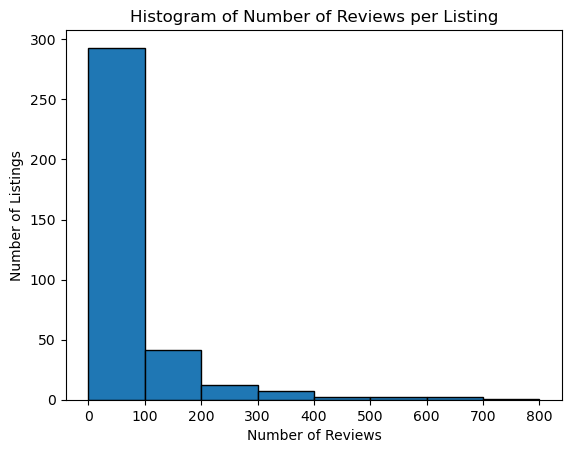

In [6]:
# Import reviews.csv
reviews = pd.read_csv(r"reviews.csv", parse_dates=['date'], encoding='utf-8')
#reviews.head(40)

# Aggregate reviews by listing_id
reviews_per_listing = reviews['listing_id'].value_counts()

# Plotting the histogram
max_reviews = reviews_per_listing.max()

# Round up to the nearest hundred
bins_range = -(max_reviews // -100) * 100 
plt.hist(reviews_per_listing, bins=range(0, bins_range + 100, 100), edgecolor='black')
plt.title('Histogram of Number of Reviews per Listing')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Listings')
plt.show()

Calculated the average occupacy per listing per month. 

Found the average reviews per month and assumed that half of the bookings result in reviews. 

In [7]:
# Created a new column `year_month` in the `reviews` DataFrame that represents the year and month of each review. 
# This is done using the `.dt.to_period('M')` method on the `date` column.
reviews['year_month'] = reviews['date'].dt.to_period('M')

# Grouped the reviews by 'listing_id' and 'year_month'.
# Then counted the number of reviews for each group to understand the review distribution over time for each listing.
reviews_grouped = reviews.groupby(['listing_id', 'year_month']).size().reset_index(name='review_count')

# Estimated the total number of bookings by doubling the number of reviews for each listing and each month. 
# This estimation is based on the assumption that roughly half of all bookings result in a review.
reviews_grouped['estimated_bookings'] = reviews_grouped['review_count'] * 2

# Average occupancy per listing per month 
avg_occupancy = reviews_grouped['estimated_bookings'].mean()

print('Average occupancy per listing per month:', "{:,.2f}".format(avg_occupancy))

Average occupancy per listing per month: 7.40


Calculated the average income per month assuming that each booking is for a three nights stay.


In [8]:
# Cleaned the price data: removed currency symbols and converted them to float
calendar['price'] = calendar['price'].replace('[$,]', '', regex=True).astype(float)

# Calculated the average price
average_price = calendar['price'].mean()

# Calculated avg income per month, assuming each booking represents a three-night stay across all listings. 
average_income_per_month = avg_occupancy * average_price * 3

#Better format 
average_income_per_month = "${:,.2f}".format(average_income_per_month)

print("Average monthly income across all listings:", average_income_per_month)

Average monthly income across all listings: $3,111.39


# Listings per Room Type


Counted the number of listings by room type, calculated their percentages, and determined the average price for each room type.

Then, grouped the listings by neighborhood and room type, calculating both the count and the average price for each combination.

The results are displayed in two DataFrames: one for room types and another for neighborhoods combined with room types.

In [9]:
# Counted listings by room type
listings_by_room_type = listings['room_type'].value_counts().reset_index(name='count')
listings_by_room_type.columns = ['Room_type', 'Total_listings']

# Calculated percentages
total_listings = listings_by_room_type['Total_listings'].sum()
listings_by_room_type['Percentage'] = ((listings_by_room_type['Total_listings'] / total_listings) * 100).round(2)
listings_by_room_type['Percentage'] = listings_by_room_type['Percentage'].astype(str) + '%'

# Calculated avg price
listings_by_room_type['Avg_price'] = listings.groupby('room_type')['price'].transform('mean')

# Displayed the number of listings per room type in absolute numbers, percentages and the avg price
print('Listings per room type: \n')
print(listings_by_room_type)

# Counted listings per neighborhood and room type
listings_by_neighborhood_room_type = listings.groupby(['neighbourhood', 'room_type']).agg(
    Count=('id', 'size'),
    Avg_price=('price', 'mean')
).reset_index()

# Display the number of listings per neighborhood and room type with avg price
print('\nListings per neighborhood and room type with average price:\n')
print(listings_by_neighborhood_room_type)

Listings per room type: 

         Room_type  Total_listings Percentage   Avg_price
0  Entire home/apt             285     70.02%   79.970874
1     Private room             119     29.24%  143.922481
2      Shared room               3      0.74%  143.922481

Listings per neighborhood and room type with average price:

      neighbourhood        room_type  Count   Avg_price
0       EIGHTH WARD  Entire home/apt      7  230.500000
1       EIGHTH WARD     Private room      2   55.000000
2     ELEVENTH WARD  Entire home/apt      7  112.428571
3     ELEVENTH WARD     Private room     12   57.916667
4    FIFTEENTH WARD  Entire home/apt     13  376.076923
5    FIFTEENTH WARD     Private room      4   53.250000
6        FIFTH WARD  Entire home/apt      6  106.333333
7        FIFTH WARD     Private room      2   68.500000
8        FIRST WARD  Entire home/apt      9  126.125000
9   FOURTEENTH WARD  Entire home/apt     13  207.538462
10  FOURTEENTH WARD     Private room     21   66.300000
11  FOUR

# Listings per Host

Created a table with the number of listings per host in descending order and a graph that shows the distribution of listings per host.

The distribution is as follows: 
- Ranked the host based on the number of listings.
- If there are multiple hosts with the same number of listings, they are ranked sequentially. 

The number of listings is on the $y$ axis.
That is, a point $(x, y)$ on the scatter plot means that the host ranked $x$-th (in terms of the number of listings) has $y$ listings.

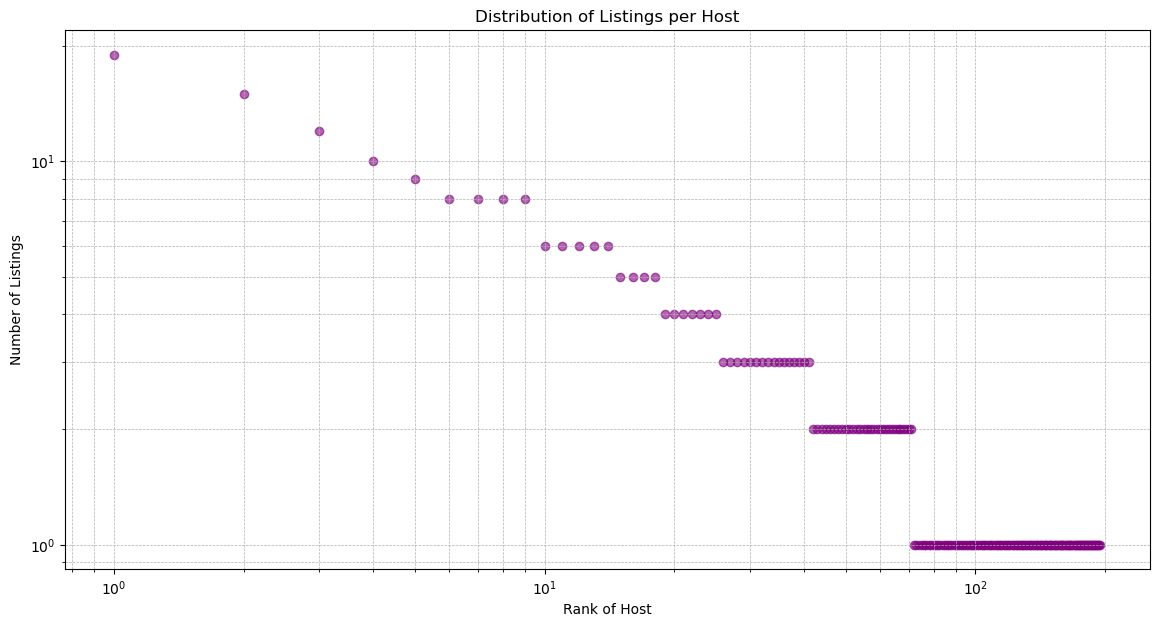

,host_id,number_of_listings,rank
0,232967878,19,1.0
1,47625981,15,2.0
2,526358730,12,3.0
3,382970529,10,4.0
4,4259750,9,5.0
...,...,...,...
190,433884293,1,191.0
191,432936385,1,192.0
192,265709295,1,193.0
193,438504176,1,194.0


In [10]:
# Counted listings per host
listings_per_host = listings['host_id'].value_counts().reset_index()
listings_per_host.columns = ['host_id', 'number_of_listings']

# Ranked the hosts based on the number of listings
listings_per_host['rank'] = listings_per_host['number_of_listings'].rank(method='first', ascending=False)

plt.figure(figsize=(14, 7))
plt.scatter(listings_per_host['rank'], listings_per_host['number_of_listings'], alpha=0.6, color='purple')
plt.title('Distribution of Listings per Host')
plt.xlabel('Rank of Host')
plt.ylabel('Number of Listings')
plt.xscale('log')  # Logarithmic scale can be useful if there is a wide distribution
plt.yscale('log')  # Logarithmic scale can be useful if there is a wide distribution
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

# Display the table
listings_per_host

# Visualize Listings

Drawed an interactive map to show the listings ovelayed on NYC. 

The map shows each listing and on clicking on top of it and the user can see a short description of the listing.

In [11]:
# Calculated the centroid of all the latitude and longitude points
centroid_lat = listings['latitude'].mean()
centroid_lon = listings['longitude'].mean()
# Created a map centered around the centroid of all listings
NYC_map = folium.Map(location=[centroid_lat, centroid_lon], zoom_start=12, max_zoom=15)
 
markerCluster = folium.plugins.MarkerCluster().add_to(NYC_map)
lat=0.
lon=0.
for index,row in listings.iterrows():
    var_price = row['price']
    var_name = row['name']
    var_neighbourhood = row['neighbourhood']
    lat=row['latitude']
    lon=row['longitude']
        
    html = f'''
    <h1>Price: </h1>{ var_price }<br>
    <h1>Name: </h1>{ var_name }<br>
    <h1>Neighbourhood: </h1>{ var_neighbourhood }<br>'''
    
    iframe = folium.IFrame(html=html, width=400, height=200)
    popup = folium.Popup(iframe, max_width=2650)
    folium.Marker([lat, lon], popup=popup).add_to(markerCluster)
 
# Save the map to an external HTML file
NYC_map.save('NYC_listings_map.html')